<a href="https://colab.research.google.com/github/fahr-khadija/Breast-Cancer-ML/blob/main/breast_cancer_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_absolute_error
from google.colab import files

# Needed to show plots inline for notebooks
%matplotlib inline

In [2]:
data=files.upload()

Saving breast_cancer_data.csv to breast_cancer_data.csv


Split the Data into Training and Testing Sets
Step 1: Read the lending_data.csv data from the Resources folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
breast_cancer_df = pd.read_csv('breast_cancer_data.csv')
# Review the DataFrame
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
breast_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
breast_cancer_df.info(31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Data Description

The dataframe has 248 rows and 31 columns that reprent breast cancer  dataset .

In [8]:
# List of columns names
columns= breast_cancer_df.columns
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

 radius',  texture', ' perimeter', ' area',
       ' smoothness', ' compactness', 'concavity',
       ' concave points', ' symmetry', ' fractal dimension'

In [9]:
# Count the number of null values in the dataframe
breast_cancer_df.isnull().sum().sum()

0

In [10]:
breast_cancer_df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
# Determine the number of unique values in each column.
for x in breast_cancer_pd.columns:
    print(x, len(breast_cancer_pd[x].unique()))

mean radius 456
mean texture 479
mean perimeter 522
mean area 539
mean smoothness 474
mean compactness 537
mean concavity 537
mean concave points 542
mean symmetry 432
mean fractal dimension 499
radius error 540
texture error 519
perimeter error 533
area error 528
smoothness error 547
compactness error 541
concavity error 533
concave points error 507
symmetry error 498
fractal dimension error 545
worst radius 457
worst texture 511
worst perimeter 514
worst area 544
worst smoothness 411
worst compactness 529
worst concavity 539
worst concave points 492
worst symmetry 500
worst fractal dimension 535
target 2


In [11]:
breast_cancer_df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64

Visualizing the dataset using seaborn, matplotlib and pandas

mean radius 456
mean texture 479
mean perimeter 522
mean area 539
mean smoothness 474
mean compactness 537
mean concavity 537
mean concave points 542
mean symmetry 432
mean fractal dimension

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>,
        <Axes: xlabel='mean compactness', ylabel='mean radius'>],
       [<Axes: xlabel='mean radius', ylabel='mean texture'>,
        <Axes: xlabel='mean texture', ylabel='mean texture'>,
        <Axes: xlabel='mean area', ylabel='mean texture'>,
        <Axes: xlabel='mean perimeter', ylabel='mean texture'>,
        <Axes: xlabel='mean smoothness', ylabel='mean texture'>,
        <Axes: xlabel='mean compactness', ylabel='mean texture'>],
       [<Axes: xlabel='mean radius', ylabel='mean area'>,
        <Axes: xlabel='mean texture', ylabel='mean area'>,
        <Axes: xlabel='mean area', ylabel='mean area'>,
        <Axes: xlabel='mean perimeter', ylabel='mean area'>,
        <Axes: x

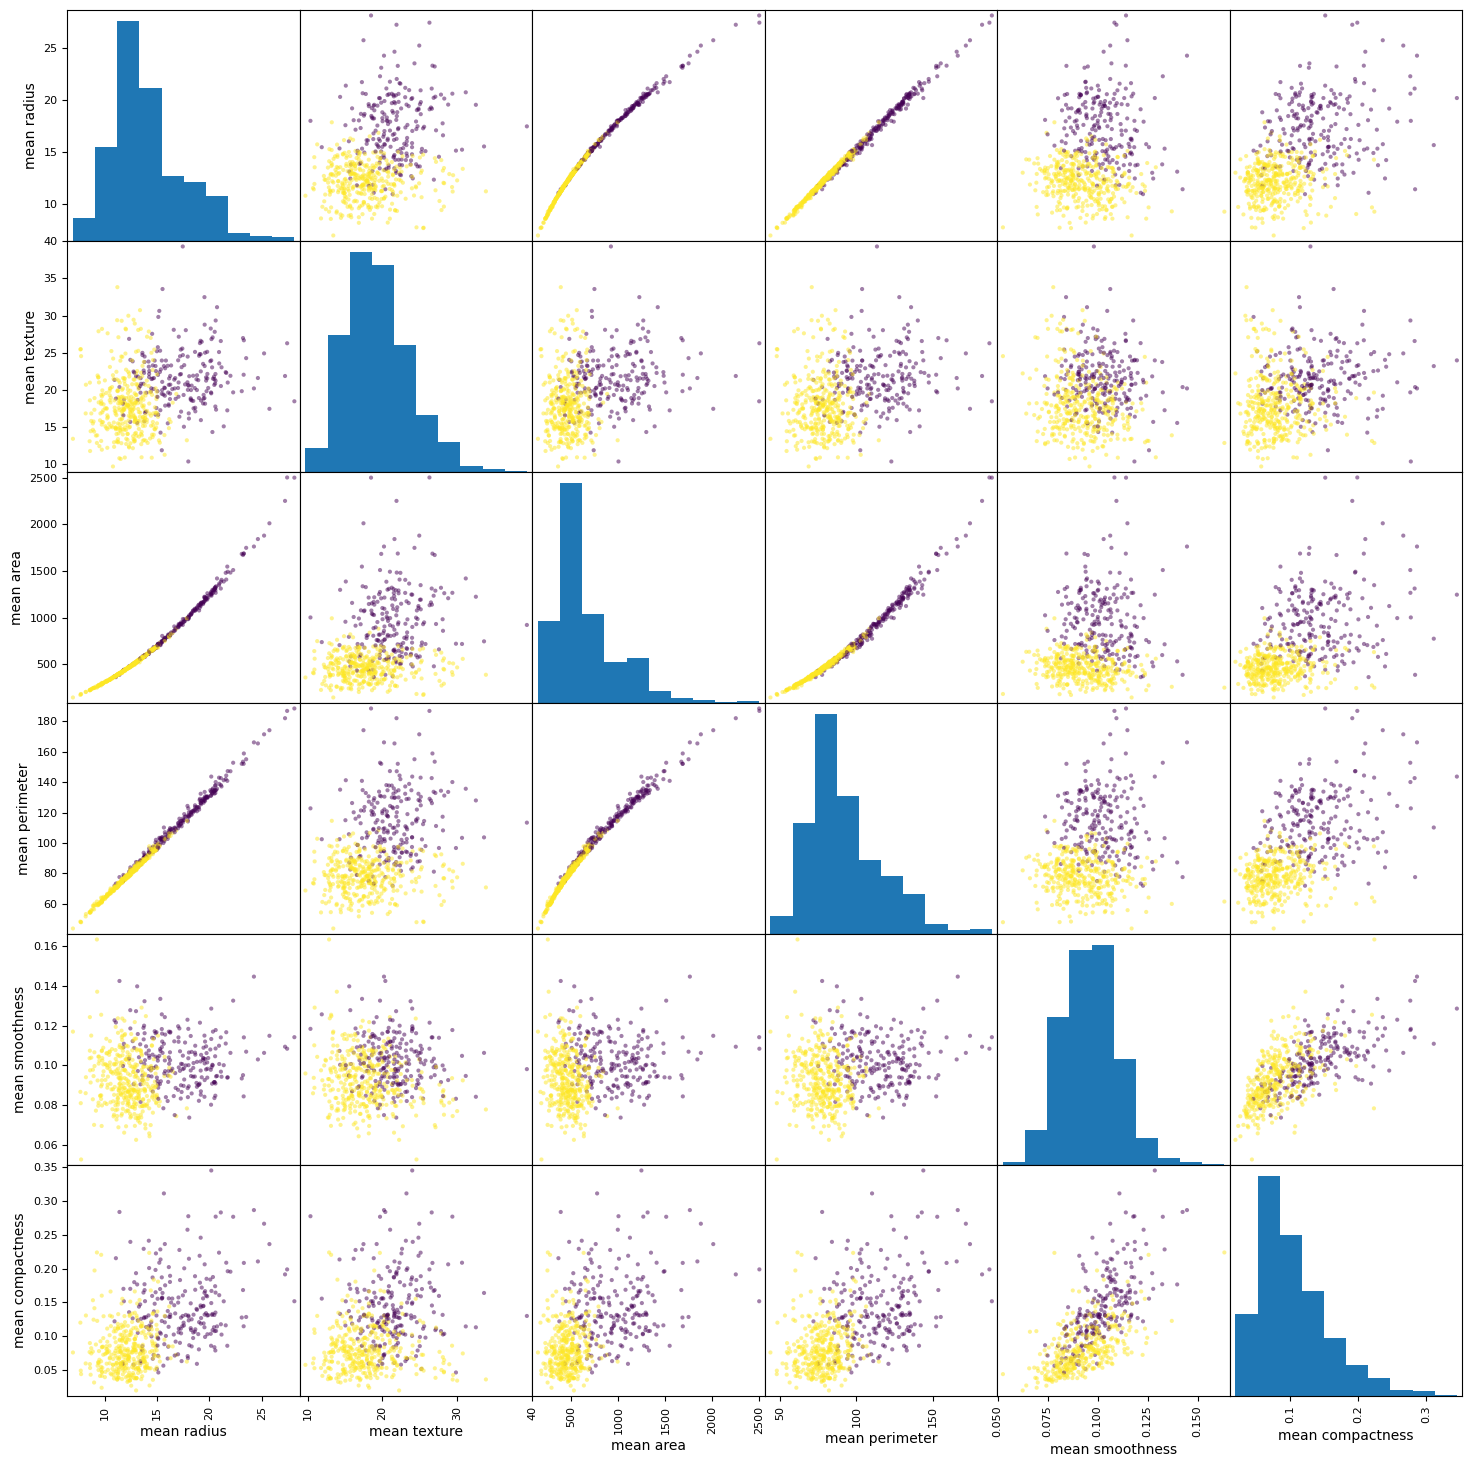

In [14]:
from pandas.plotting import scatter_matrix
attributes = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness','mean compactness']
scatter_matrix(breast_cancer_df[attributes], figsize = (18,18), c=breast_cancer_df['target'])

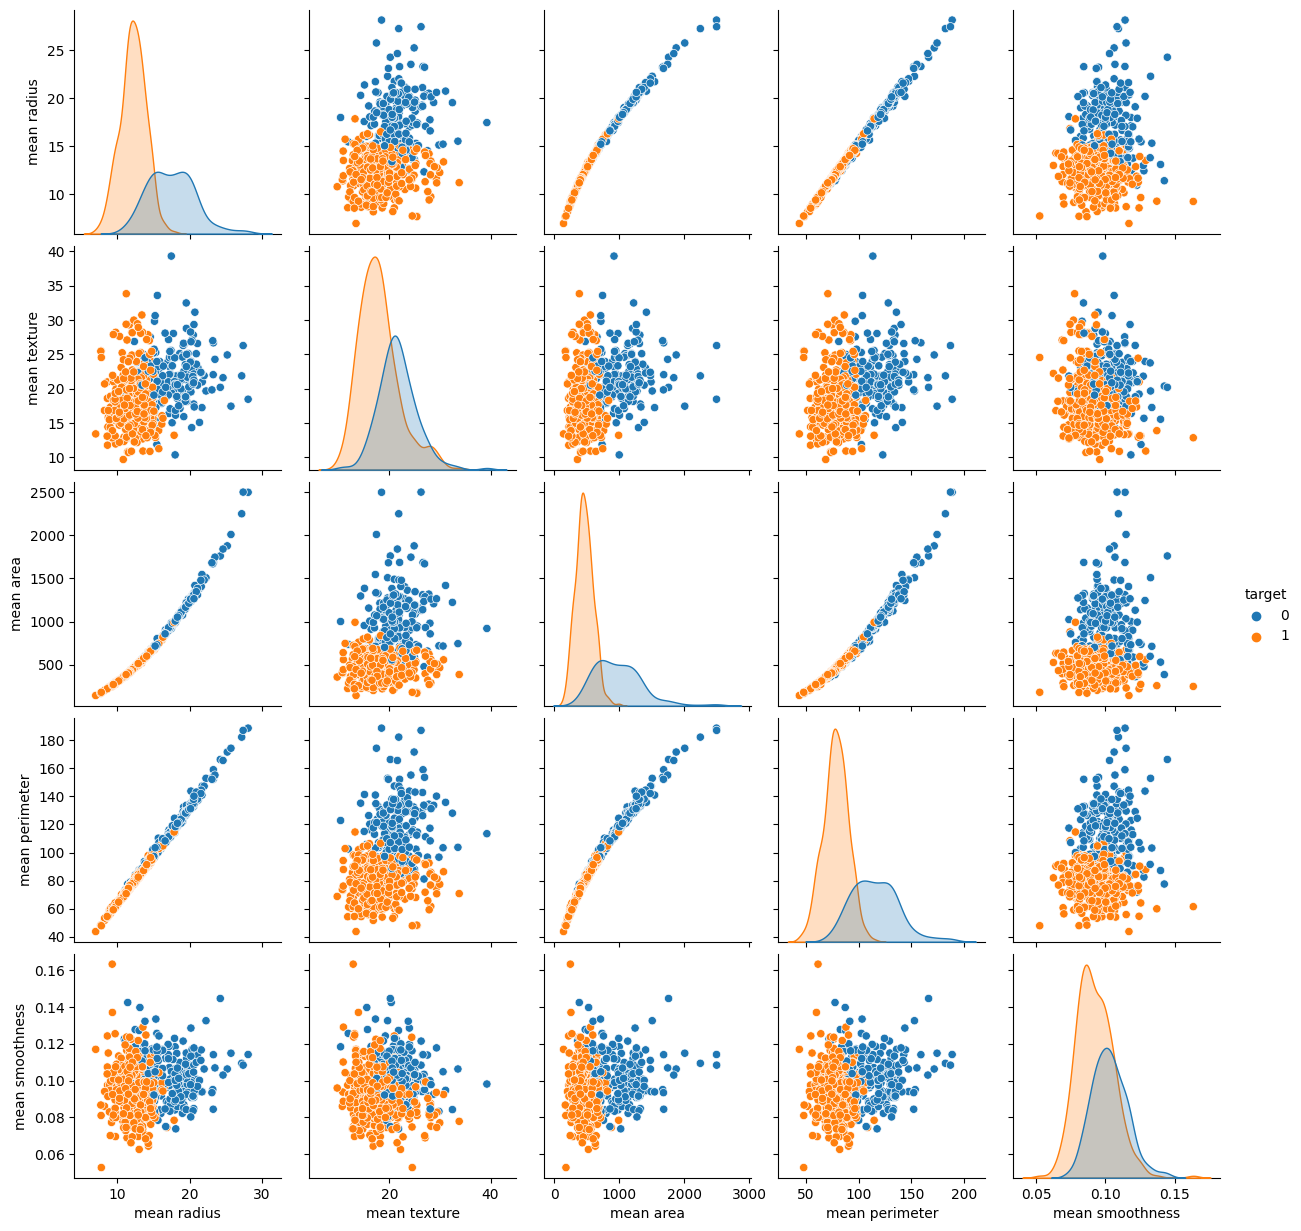

In [ ]:
sns.pairplot(breast_cancer_df, hue="target", vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

How many Benign and Malignant do we have in our dataset?

In [15]:
breast_cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

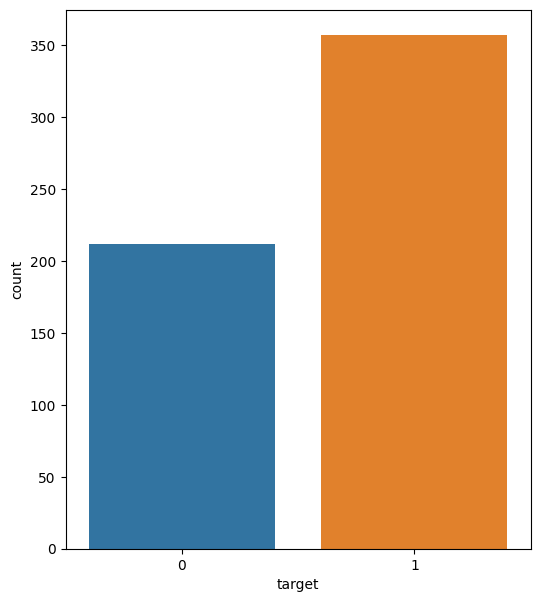

In [16]:
# Let's print out countplot of the target  to know how many persons have a cancer "1"
plt.figure(figsize = (6,7))
sns.countplot(breast_cancer_df, x="target")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split our preprocessed data into our features and target arrays

y = breast_cancer_df['target'].values
# drop 'target'
X = breast_cancer_df.drop('target', axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


Compile, Train and Evaluate the Model

Model1

In [20]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=40
hidden_nodes_layer2=20


model1 = tf.keras.models.Sequential()

# First hidden layer
model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

# Output layer
model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1240      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [22]:
# Train the model
fit_model=model1.fit(X_train_scaled,y_train,validation_split=0.40, epochs=30)

Epoch 1/30
8/8 [==============================] - 1s 42ms/step - loss: 0.4964 - accuracy: 0.8235 - val_loss: 0.4542 - val_accuracy: 0.8772
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 0.3614 - accuracy: 0.9333 - val_loss: 0.3434 - val_accuracy: 0.9240
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.2799 - accuracy: 0.9569 - val_loss: 0.2757 - val_accuracy: 0.9298
Epoch 4/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2285 - accuracy: 0.9608 - val_loss: 0.2319 - val_accuracy: 0.9474
Epoch 5/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1912 - accuracy: 0.9608 - val_loss: 0.2033 - val_accuracy: 0.9591
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1643 - accuracy: 0.9647 - val_loss: 0.1828 - val_accuracy: 0.9532
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1429 - accuracy: 0.9686 - val_loss: 0.1665 - val_accuracy: 0.9591
Epoch 8/30
8/8 [===============

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.0522 - accuracy: 0.9930 - 44ms/epoch - 9ms/step
Loss: 0.052177414298057556, Accuracy: 0.9930070042610168


In [25]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30
hidden_nodes_layer3=21

model2 = tf.keras.models.Sequential()

# First hidden layer
model2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2480      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4941 (19.30 KB)
Trainable params: 4941 (19.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compile the model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [28]:
# Train the model
fit_model=model2.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 32ms/step - loss: 0.6141 - accuracy: 0.6934 - val_loss: 0.3773 - val_accuracy: 0.9375
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3311 - accuracy: 0.9392 - val_loss: 0.2344 - val_accuracy: 0.9531
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.2151 - accuracy: 0.9558 - val_loss: 0.1697 - val_accuracy: 0.9375
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1611 - accuracy: 0.9613 - val_loss: 0.1338 - val_accuracy: 0.9688
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1274 - accuracy: 0.9696 - val_loss: 0.1151 - val_accuracy: 0.9688
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1057 - accuracy: 0.9807 - val_loss: 0.1051 - val_accuracy: 0.9688
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0918 - accuracy: 0.9834 - val_loss: 0.0978 - val_accuracy: 0.9688
Epoch 8/100

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.1070 - accuracy: 0.9790 - 293ms/epoch - 59ms/step
Loss: 0.10700162500143051, Accuracy: 0.9790209531784058


In [32]:
# Evaluate the model using the train data
model_loss, model_accuracy = model2.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

14/14 - 0s - loss: 0.0150 - accuracy: 0.9953 - 40ms/epoch - 3ms/step
Loss: 0.014985169284045696, Accuracy: 0.9953051805496216


In [34]:
# Export our model to HDF5 file
from google.colab import files

model2.save('/content/Model_1.h5')
files.download('/content/Model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Load Model 🐪***

**Predict in new Data**

In [ ]:
data=files.upload()

Saving breast_cancer_data_2.csv to breast_cancer_data_2.csv


In [ ]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
breast_cancer_data_pd = pd.read_csv('breast_cancer_data_2.csv')
# Review the DataFrame
breast_cancer_data_pd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
# Load the model
model = load_model ('/content/Model_1.h5', compile = True)

In [ ]:
new_predict = model.predict()

In [ ]:

# A few random samples
use_samples = [5, 38, 3939, 27389]
samples_to_predict = []

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)


OSError: Unable to load model. Filepath is not an hdf5 file (or h5py is not available) or SavedModel. Received: filepath=     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.07678       0  
..                    ...             ...                      ...     ...  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[569 rows x 31 columns]

**Then, we'll add some code for visualizing the samples that we'll be using in today's post:**

In [ ]:
# A few random samples
use_samples = [5, 38, 3939, 27389]

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = input_train[sample].reshape((img_width, img_height))
  plt.imshow(reshaped_image)
  plt.show()